In [102]:
using DrWatson
@quickactivate "sst-mot-analysis"

import DrWatson: datadir, srcdir
import DrWatson: @quickactivate
include(srcdir("compare_random_samples.jl"))

using GH19, TMI, PythonCall, Revise
using CSV, DataFrames

In [103]:
function iswetloc(loc, γ1::Grid, γ2::Grid)
    if length(loc) < 3
        loc3 = (loc..., γ1.depth[2])
        return (iswet(loc3,γ1) * iswet(loc3,γ2)) 
    elseif length(lo) == 3
        return (iswet(loc,γ1) * iswet(loc,γ2)) 
    end
end

iswetloc(x) = iswetloc(x, γ_lgm, γ_PI)

iswetloc (generic function with 2 methods)

In [104]:
# Configure LGM dataset
TMIversion_lgm = "LGM_90x45x33_G14"
A_lgm, Alu_lgm, γ_lgm, TMIfile_lgm, L_lgm, B_lgm = config(TMIversion_lgm);

# Configure PI dataset
TMIversion_PI = "modern_180x90x33_GH11_GH12"
A_PI, Alu_PI, γ_PI, TMIfile_PI, L_PI, B_PI = config(TMIversion_PI);

A
  0.039150 seconds (4.36 k allocations: 34.887 MiB)
Alu
  0.532778 seconds (88 allocations: 477.426 MiB, 1.85% gc time)
L=
  0.002951 seconds (764 allocations: 63.273 KiB)
B=
  0.002073 seconds (763 allocations: 63.250 KiB)
A
  0.045673 seconds (5.23 k allocations: 118.943 MiB, 2.20% gc time)
Alu
  4.051860 seconds (88 allocations: 2.814 GiB, 0.32% gc time)
L=
  0.125960 seconds (8.14 M allocations: 224.521 MiB, 4.22% gc time)
B=
  0.018717 seconds (6.14 k allocations: 7.270 MiB, 26.34% gc time)


In [109]:
OC3_locs_df = 1 .*  DataFrame(CSV.File(datadir("OC3_sites_positions.csv")))[:, 3:4]

OC3_lons = OC3_locs_df.var"Longitude (degE)"
OC3_lons[OC3_lons .< 0.0] .+= 360

OC3_lats = OC3_locs_df.var"Latitude (degN)"

nOC3_locs = size(OC3_locs_df, 1)

OC3_locs = Vector{Tuple{Float64, Float64}}(undef, nOC3_locs)

[OC3_locs[i] = (OC3_lons[i], OC3_lats[i]) for i in eachindex(OC3_locs)]
            
OC3_locs = unique(OC3_locs[iswetloc.(OC3_locs)]);

In [113]:
Nboot = 2500
N_sample = length(OC3_locs)
OC3_locs_sampl_results  = bootstrap_PI_lgm_differences(N_sample, Nboot; locs = OC3_locs);

A
  0.035328 seconds (4.34 k allocations: 34.887 MiB)
Alu
  0.533797 seconds (88 allocations: 477.426 MiB, 0.60% gc time)
L=
  0.002866 seconds (764 allocations: 63.273 KiB)
B=
  0.002240 seconds (763 allocations: 63.250 KiB)
A
  0.043717 seconds (5.23 k allocations: 118.943 MiB)
Alu
  4.932264 seconds (91 allocations: 2.810 GiB, 0.63% gc time)
L=
  0.135714 seconds (8.14 M allocations: 228.552 MiB)
B=
  0.013648 seconds (6.14 k allocations: 7.270 MiB)
A
  0.027663 seconds (5.23 k allocations: 118.943 MiB)
Alu
  5.305119 seconds (88 allocations: 2.810 GiB, 0.30% gc time)
L=
  0.124519 seconds (8.14 M allocations: 224.520 MiB)
B=
  0.011018 seconds (6.14 k allocations: 7.270 MiB)


Running 2500 MC trials (n=286).. 100%|███████████████████| Time: 0:05:47


In [125]:
GMST_scaled(ΔSST)  = -0.037629 + 1.603508*ΔSST - 0.058842*(ΔSST^2)

GMST_scaled (generic function with 1 method)

In [126]:
ΔSST = mean(OC3_locs_sampl_results["bootstrapped_profiles"]["PI_surface"]) - mean(OC3_locs_sampl_results["bootstrapped_profiles"]["LGM_surface"])

5.072116909954266

In [127]:
GMST_scaled(ΔSST) 

6.58175998155237

In [ ]:
ΔGMST = -0.037629 + 1.603508 ΔSST - 0.058842 ΔSST2

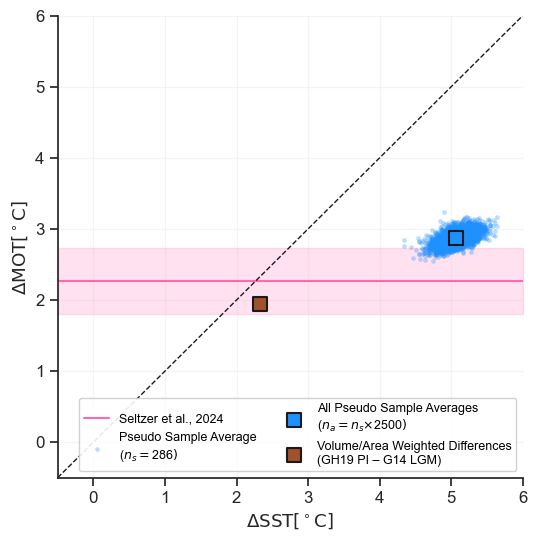

In [114]:
generate_temperature_difference_plot(
    OC3_locs_sampl_results,
    :uniform, N_sample, Nboot, plotsdir("S.LGM_PI_Temp_diff_weighted_OC3_samples.png"); xlims = (-0.5, 6)
);